## Homework 2 - How do Taxis move in NYC?

For this Homework, we work with a really big dataset – So I downloaded tens of gigabytes of data from the New York City Taxi and Limousine Commission and set out to produce some deep analyses of taxi and Uber ride patterns.
However, I soon discovered that there is big data, and then there is big data. Humongous tables – 10 million taxi trips per month . So I have chosen to reduce my scope first of all deleting usless Data.

In [3]:
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
borough_names = ['Manhattan','Brooklyn','Queens','Bronx','Staten Island','Unknown','EWR']
data_zone = pandas.read_csv('taxi _zone_lookup.csv',usecols=[0,1])
df = pd.DataFrame(columns=['Manhattan','Brooklyn','Queens','Bronx','Staten Island','Unknown','EWR'])


##### [RQ1] In what period of the year Taxis are used more? Create a plot that, for each month, shows the average number of trips recorded each day. Due to the differences among New York zones, we want to visualize the same information for each boroughs. Do you notice any difference among them? Provide comments and plausible explanations about what you observe (e.g.: what is the month with the highest daily average?).

In [4]:
for month in ['01', '02', '03', '04', '05','06']:
    data_frame = pandas.read_csv('yellow_tripdata_2018-'+month+'.csv',usecols=[1,2,3,4,7,9,16])
    
    data_frame=data_frame[data_frame.trip_distance !=0]
    data_frame=data_frame[data_frame.total_amount !=0]
    data_frame_zone=pd.merge(data_frame,data_zone,how ='left',left_on='PULocationID',right_on='LocationID')
    data_frame_zone.head()
    data_frame_zone=pd.merge(data_frame,data_zone,how ='left',left_on='PULocationID',right_on='LocationID')
    data_frame_zone.head()
    data_frame_zone.tpep_pickup_datetime.str.slice(-5,-3).astype(int).head()
    data_frame_zone['tpep_pickup_datetime']=pd.to_datetime(data_frame_zone.tpep_pickup_datetime)
    data_frame_zone.tpep_dropoff_datetime.str.slice(-5,-3).astype(int).head()
    data_frame_zone.tpep_dropoff_datetime.str.slice(-5,-3).astype(int).head()
    data_frame_zone['tpep_dropoff_datetime']=pd.to_datetime(data_frame_zone.tpep_dropoff_datetime)
    Travel_time=data_frame_zone['tpep_dropoff_datetime']-data_frame_zone['tpep_pickup_datetime']
    data_frame_zone.insert(loc=2,column='Travel_time',value=Travel_time)
    data_frame_zone.head()
    list_new = []
    
    for i in borough_names:
        borough_data = data_frame_zone.loc[(data_frame_zone['Borough'] == i)]
        day = borough_data['tpep_pickup_datetime'].dt.day
        average = sum(day.value_counts())/len(day.value_counts())
        list_new.append(int(average))
    
    month=int(month)
    df.loc[month]=list_new



TLC’s taxi dataset, is very extensive and contains useful variables on price, duration, distance, passengers, date, time, and most importantly, origin and destination but i have choose only the Data that were important for my analyzis.

In [68]:
list_new

[253123, 3900, 18061, 320, 4, 3744, 6]

##### [RQ2] What are the time slots with more passengers? Set your own time slots and discover which are those when Taxis drive the highest number of passengers overall New York and repeat the analysis for each borough. Provide the results through a visualization and comment them.

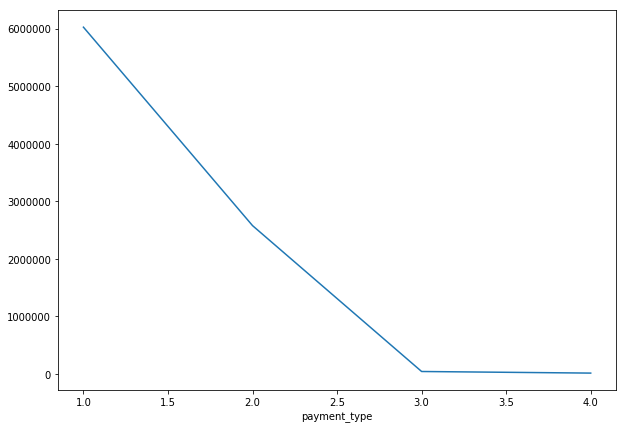

In [30]:

import matplotlib.pyplot as pls 


fig, ax = plt.subplots(figsize=(10,7))
data_frame_zone.groupby(['payment_type']).count()['Borough'].plot(ax=ax)


In [53]:
type(data_frame_zone)

pandas.core.frame.DataFrame

In [54]:
data_frame_zone['payment_type'].value_counts()

1    6025641
2    2575935
3      39959
4      12152
Name: payment_type, dtype: int64

In [20]:
for month in ['01', '02', '03', '04', '05','06']:
    data_frame = pandas.read_csv('yellow_tripdata_2018-'+month+'.csv',usecols=[1,2,3,4,7,9,16])

    data_frame=data_frame[data_frame.trip_distance !=0]
    data_frame=data_frame[data_frame.total_amount !=0]
    data_frame_zone=pd.merge(data_frame,data_zone,how ='left',left_on='PULocationID',right_on='LocationID')
    data_frame_zone.head()
    data_frame_zone=pd.merge(data_frame,data_zone,how ='left',left_on='PULocationID',right_on='LocationID')
    data_frame_zone.head()
    data_frame_zone.tpep_pickup_datetime.str.slice(-5,-3).astype(int).head()
    data_frame_zone['tpep_pickup_datetime']=pd.to_datetime(data_frame_zone.tpep_pickup_datetime)
    data_frame_zone.tpep_dropoff_datetime.str.slice(-5,-3).astype(int).head()
    data_frame_zone.tpep_dropoff_datetime.str.slice(-5,-3).astype(int).head()
    data_frame_zone['tpep_dropoff_datetime']=pd.to_datetime(data_frame_zone.tpep_dropoff_datetime)
    Travel_time=data_frame_zone['tpep_dropoff_datetime']-data_frame_zone['tpep_pickup_datetime']
    data_frame_zone.insert(loc=2,column='Travel_time',value=Travel_time)


    data_frame_zone.loc[:,'hours']=data_frame_zone['tpep_pickup_datetime'].dt.hour
    Passeggeri_ora_zona = data_frame_zone.groupby(['Borough','hours'])['passenger_count'].agg('sum')

    Passeggeri_ora_zona=Passeggeri_ora_zona.unstack().fillna(0)

    Passeggeri_ora_zona=Passeggeri_ora_zona.transpose()
    if int(month)==1:
        Passeggeri_ora_zona_new= Passeggeri_ora_zona
    else:
        Passeggeri_ora_zona_new=Passeggeri_ora_zona_new.add(Passeggeri_ora_zona)

        

In [21]:
Passeggeri_ora_zona_new

Borough,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island,Unknown
hours,,,,,,,
0,2826.0,71557.0,3.0,2417738.0,185682.0,39.0,34992.0
1,2366.0,51232.0,6.0,1698041.0,89338.0,35.0,24387.0
2,2010.0,38801.0,8.0,1230722.0,43307.0,28.0,17919.0
3,1815.0,30954.0,8.0,897409.0,30434.0,42.0,13391.0
4,2170.0,27006.0,35.0,681714.0,42847.0,56.0,10096.0
5,2671.0,17415.0,53.0,700469.0,76667.0,48.0,10749.0
6,4141.0,34374.0,79.0,1654677.0,128190.0,13.0,23259.0
7,6390.0,49595.0,57.0,2868548.0,180222.0,19.0,38608.0
8,5831.0,57832.0,47.0,3614284.0,193620.0,32.0,47649.0


##### [RQ3] Do the all trips last the same? Let's put our attention on the distribution of trip's duration. Provide a plot for it and comment what you see. Run this analysis for NYC and for each borough (and obviously comment the results!).


In [29]:
for month in ['01', '02', '03', '04', '05','06']:
    data_frame = pandas.read_csv('yellow_tripdata_2018-'+month+'.csv',usecols=[1,2,3,4,7,9,16])

    data_frame=data_frame[data_frame.trip_distance !=0]
    data_frame=data_frame[data_frame.total_amount !=0]
    data_frame_zone=pd.merge(data_frame,data_zone,how ='left',left_on='PULocationID',right_on='LocationID')
    data_frame_zone.head()
    data_frame_zone=pd.merge(data_frame,data_zone,how ='left',left_on='PULocationID',right_on='LocationID')
    data_frame_zone.head()
    data_frame_zone.tpep_pickup_datetime.str.slice(-5,-3).astype(int).head()
    data_frame_zone['tpep_pickup_datetime']=pd.to_datetime(data_frame_zone.tpep_pickup_datetime)
    data_frame_zone.tpep_dropoff_datetime.str.slice(-5,-3).astype(int).head()
    data_frame_zone.tpep_dropoff_datetime.str.slice(-5,-3).astype(int).head()
    data_frame_zone['tpep_dropoff_datetime']=pd.to_datetime(data_frame_zone.tpep_dropoff_datetime)
    Travel_time=data_frame_zone['tpep_dropoff_datetime']-data_frame_zone['tpep_pickup_datetime']
    data_frame_zone.insert(loc=2,column='Travel_time',value=Travel_time)


    data_frame_zone.loc[:,'hours']=data_frame_zone['tpep_pickup_datetime'].dt.hour
    Passeggeri_ora_zona = data_frame_zone.groupby(['Borough','hours'])['passenger_count'].agg('sum')

    Passeggeri_ora_zona=Passeggeri_ora_zona.unstack().fillna(0)
    Travel_time_sum=data_frame_zone.groupby(['Borough','hours'])['Travel_time'].sum()
    Travel_time_count=data_frame_zone.groupby(['Borough','hours'])['Travel_time'].count()
    Travel_time_sum=Travel_time_sum.divide(Travel_time_count)
    Travel_time_sum=Travel_time_sum.unstack().fillna(0)
    Travel_time_sum=Travel_time_sum.transpose()
    

In [31]:
Travel_time_sum

Borough,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island,Unknown
hours,,,,,,,
0,00:13:22.770186,00:16:37.101474,00:00:00,00:15:29.563781,00:25:49.593794,00:55:22,00:16:08.903890
1,00:22:53.716666,00:15:53.668165,00:00:51,00:14:50.207871,00:25:19.265278,00:14:55.750000,00:14:17.485451
2,00:12:12.688118,00:15:35.490186,00:00:44,00:14:46.621577,00:18:51.029333,00:07:36.500000,00:12:20.317333
3,00:19:30.422680,00:15:31.326779,00:00:00,00:15:31.180644,00:17:30.943061,00:09:23.500000,00:15:31.112537
4,00:13:47.906474,00:16:47.062127,00:00:33.800000,00:15:57.608952,00:18:49.583412,00:20:17.250000,00:12:48.775201
5,00:25:00.301948,00:16:28.194160,00:01:07,00:13:37.378800,00:28:58.213894,00:13:15.750000,00:11:51.099597
6,00:28:45.721276,00:20:32.501642,00:05:50.400000,00:13:25.730977,00:38:27.198940,00:00:00,00:16:04.615858
7,00:33:17.956521,00:23:01.193853,00:10:53.642857,00:15:04.299395,00:44:42.319831,01:26:48,00:17:21.863481
8,00:26:36.884740,00:23:54.609833,00:03:50.333333,00:16:04.701872,00:43:38.625910,00:33:31,00:16:42.535472


##### [RQ4] What is the most common way of payments? Discover the way payments are executed in each borough and visualize the number of payments for any possible means. Then run the Chi-squared test to see whether the method of payment is correlated to the borough. Then, comment the results

In [64]:
for month in ['01', '02', '03', '04', '05','06']:
    data_frame = pandas.read_csv('yellow_tripdata_2018-'+month+'.csv',usecols=[1,2,3,4,7,9,16])

    data_frame=data_frame[data_frame.trip_distance !=0]
    data_frame=data_frame[data_frame.total_amount !=0]
    data_frame_zone=pd.merge(data_frame,data_zone,how ='left',left_on='PULocationID',right_on='LocationID')
    data_frame_zone.head()
    data_frame_zone=pd.merge(data_frame,data_zone,how ='left',left_on='PULocationID',right_on='LocationID')
    data_frame_zone.head()
    data_frame_zone.tpep_pickup_datetime.str.slice(-5,-3).astype(int).head()
    data_frame_zone['tpep_pickup_datetime']=pd.to_datetime(data_frame_zone.tpep_pickup_datetime)
    data_frame_zone.tpep_dropoff_datetime.str.slice(-5,-3).astype(int).head()
    data_frame_zone.tpep_dropoff_datetime.str.slice(-5,-3).astype(int).head()
    data_frame_zone['tpep_dropoff_datetime']=pd.to_datetime(data_frame_zone.tpep_dropoff_datetime)
    Travel_time=data_frame_zone['tpep_dropoff_datetime']-data_frame_zone['tpep_pickup_datetime']
    data_frame_zone.insert(loc=2,column='Travel_time',value=Travel_time)
    Travel_time_new=data_frame_zone.groupby(['Borough','hour    Travel_time_new=data_frame_zone.groupby(['Borough','hours'])['payment_type'].sum().
    
    
  

KeyboardInterrupt: 

In [66]:
Travel_time_new=data_frame_zone.groupby(['Borough','hours'])['payment_type'].sum()
 

KeyError: 'hours'


##### [RQ5] Does a long distance correlate with the duration of the trip on average? Make a plot that show the dependence between distance and duration of the trip. Then compute the Pearson Coefficient, is it significant? Comment the results you obtain.